<a href="https://colab.research.google.com/github/Guava001/Embedded-ML-for-EV-Charging/blob/main/EV_FinalYear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import seaborn as sns
from xgboost import XGBRegressor

In [ ]:
# Load the data
data = pd.read_csv('/Final_data.csv')

In [ ]:
# Let's first examine the data
print(data.head())
print("\nData shape:", data.shape)
print("\nData info:")
data.info()
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

   Time  PercentageEVcharging  Powerperchargingevent  \
0  0.15              0.384401               0.111502   
1  0.26              0.738108               0.214102   
2  0.49              1.067935               0.309774   
3  0.56              1.385194               0.401800   
4  0.72              1.683004               0.488185   

   Continousnoofchargingevents  Totalchargingpower  charging_duration_Min  \
0                     2.003325            0.223376               0.171236   
1                     3.846687            0.823581               0.631346   
2                     5.565595            1.724075               1.321651   
3                     7.219002            2.900596               2.223555   
4                     8.771053            4.281898               3.282441   

   Energychargingevent  
0             0.000318  
1             0.002253  
2             0.006824  
3             0.014890  
4             0.026707  

Data shape: (1328, 7)

Data info:
<class 'pandas.

In [ ]:
# Convert 'Time' to hours of the day (assuming it's already in hours)
# If 'Time' is in decimal hours (e.g., 0.15, 0.26, etc.), we can keep it as is
# Let's map it to hours of the day (0-24)
# For simplicity, let's assume the data represents a 24-hour cycle

# Extract features and target
X = data[['Time']]  # Using 'Time' as our predictor
y = data['Powerperchargingevent']  # Target variable: power per charging event

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

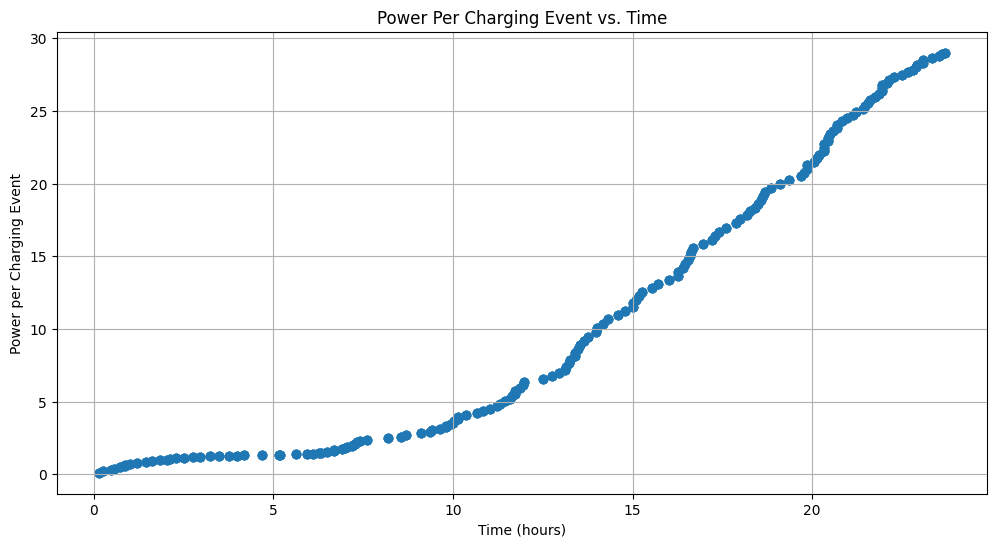

In [ ]:
# Data visualization
plt.figure(figsize=(12, 6))
plt.scatter(data['Time'], data['Powerperchargingevent'], alpha=0.5)
plt.title('Power Per Charging Event vs. Time')
plt.xlabel('Time (hours)')
plt.ylabel('Power per Charging Event')
plt.grid(True)
plt.savefig('power_vs_time_scatter.png')
plt.show()
plt.close()

In [ ]:
# Create a list of different regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Support Vector Regression': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Evaluate each model
for name, model in models.items():
    # Create a pipeline with scaling for some models that need it
    if name in ['Ridge Regression', 'Lasso Regression', 'ElasticNet', 'Support Vector Regression']:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('model', model)
        ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Model': pipeline
    }

    print(f"\n{name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[model]['RMSE'] for model in results],
    'MAE': [results[model]['MAE'] for model in results],
    'R²': [results[model]['R²'] for model in results]
})

# Sort by R²
comparison_df = comparison_df.sort_values('R²', ascending=False).reset_index(drop=True)
print("\nModel Comparison:")
print(comparison_df)

# Get the best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['Model']


Linear Regression Results:
RMSE: 2.9873
MAE: 2.6516
R²: 0.9011

Ridge Regression Results:
RMSE: 2.9885
MAE: 2.6539
R²: 0.9011

Lasso Regression Results:
RMSE: 3.2480
MAE: 2.9200
R²: 0.8831

ElasticNet Results:
RMSE: 4.6539
MAE: 4.0507
R²: 0.7601

Support Vector Regression Results:
RMSE: 0.2926
MAE: 0.2172
R²: 0.9991

Random Forest Results:
RMSE: 0.0500
MAE: 0.0185
R²: 1.0000

Gradient Boosting Results:
RMSE: 0.0589
MAE: 0.0362
R²: 1.0000

XGBoost Results:
RMSE: 0.0496
MAE: 0.0174
R²: 1.0000

Model Comparison:
                       Model      RMSE       MAE        R²
0                    XGBoost  0.049607  0.017436  0.999973
1              Random Forest  0.050029  0.018481  0.999972
2          Gradient Boosting  0.058870  0.036212  0.999962
3  Support Vector Regression  0.292646  0.217178  0.999051
4          Linear Regression  2.987252  2.651638  0.901137
5           Ridge Regression  2.988501  2.653894  0.901055
6           Lasso Regression  3.247994  2.920013  0.883126
7           

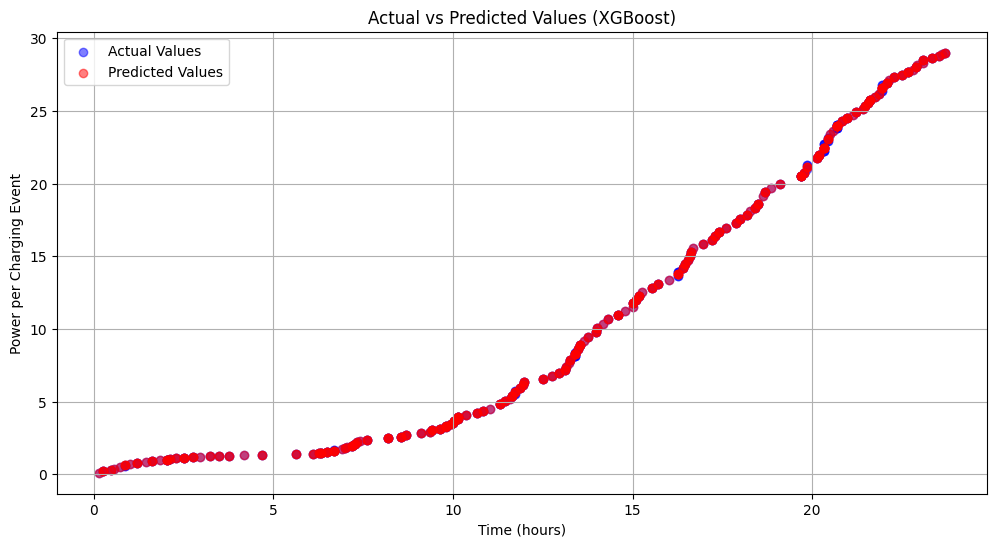

In [ ]:
# Visualize predictions from the best model
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Values')
plt.scatter(X_test, best_model.predict(X_test), color='red', alpha=0.5, label='Predicted Values')
plt.title(f'Actual vs Predicted Values ({best_model_name})')
plt.xlabel('Time (hours)')
plt.ylabel('Power per Charging Event')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('best_model_predictions.png')
plt.close()

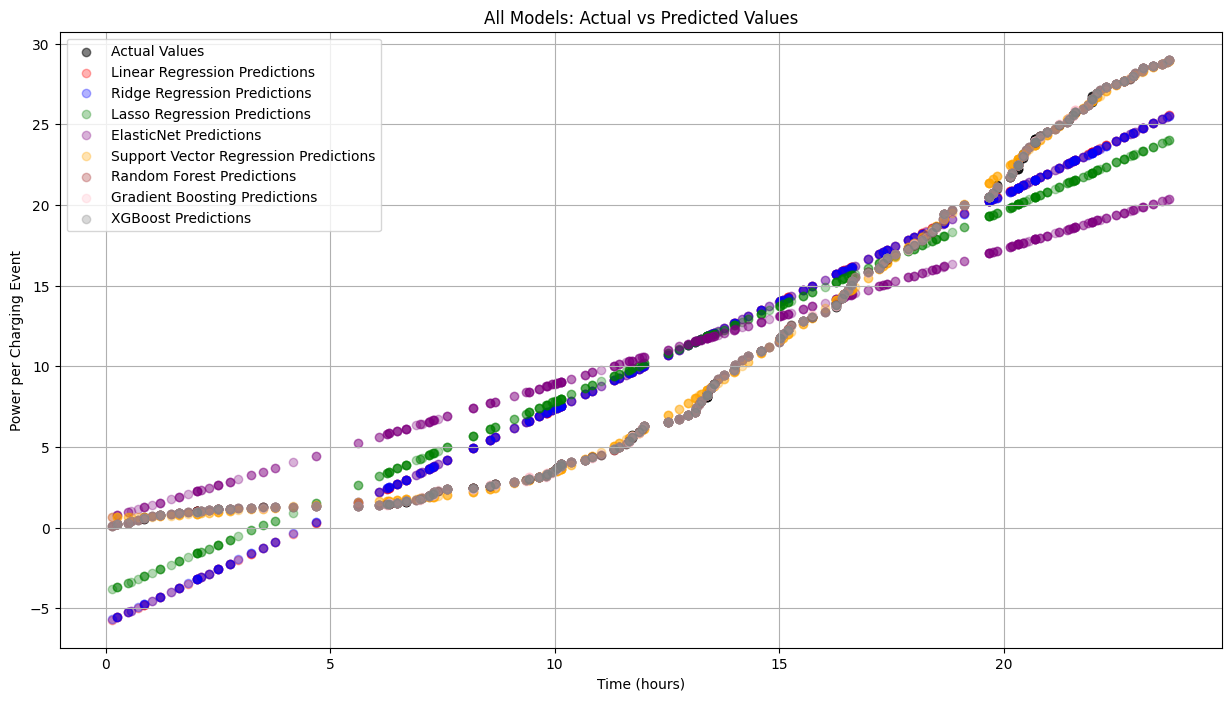

In [ ]:
# Plot all models' predictions on the test set
plt.figure(figsize=(15, 8))
plt.scatter(X_test, y_test, color='black', alpha=0.5, label='Actual Values')

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']
for (name, result), color in zip(results.items(), colors):
    model = result['Model']
    predictions = model.predict(X_test)
    plt.scatter(X_test, predictions, color=color, alpha=0.3, label=f'{name} Predictions')

plt.title('All Models: Actual vs Predicted Values')
plt.xlabel('Time (hours)')
plt.ylabel('Power per Charging Event')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('all_models_predictions.png')
plt.close()

In [ ]:
# Generate predictions for each hour of the day (0-24)
hours = np.arange(0, 24, 0.5).reshape(-1, 1)  # Half-hour intervals
predictions = {}

for name, result in results.items():
    model = result['Model']
    pred = model.predict(hours)
    predictions[name] = pred

# Create a DataFrame with the hourly predictions
hourly_predictions = pd.DataFrame({
    'Hour': hours.flatten()
})

for name, pred in predictions.items():
    hourly_predictions[name] = pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/

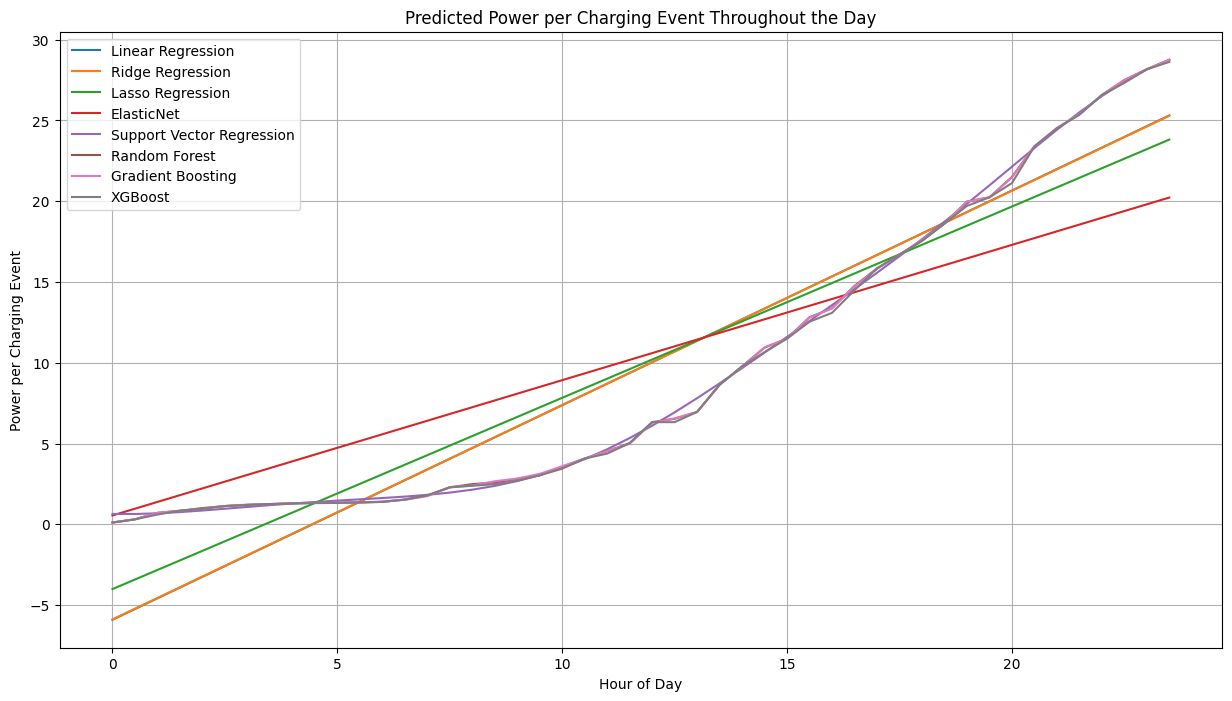

In [ ]:
# Plot the hourly predictions for all models
plt.figure(figsize=(15, 8))
for name in predictions.keys():
    plt.plot(hourly_predictions['Hour'], hourly_predictions[name], label=name)

plt.title('Predicted Power per Charging Event Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Power per Charging Event')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('hourly_predictions.png')
plt.close()


In [ ]:
# Feature importance for tree-based models
tree_models = ['Random Forest', 'Gradient Boosting', 'XGBoost']
for name in tree_models:
    if name in results:
        model = results[name]['Model'].named_steps['model']
        importance = model.feature_importances_

        print(f"\nFeature Importance for {name}:")
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importance
        })
        print(feature_importance.sort_values('Importance', ascending=False))

# Find the best model based on R²
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['Model']
print(f"\nBest Model: {best_model_name} with R² of {results[best_model_name]['R²']:.4f}")

# Generate predictions for a full day with the best model
full_day_hours = np.arange(0, 24, 0.1).reshape(-1, 1)  # 0.1 hour intervals
full_day_predictions = best_model.predict(full_day_hours)


Feature Importance for Random Forest:
  Feature  Importance
0    Time         1.0

Feature Importance for Gradient Boosting:
  Feature  Importance
0    Time         1.0

Feature Importance for XGBoost:
  Feature  Importance
0    Time         1.0

Best Model: XGBoost with R² of 1.0000


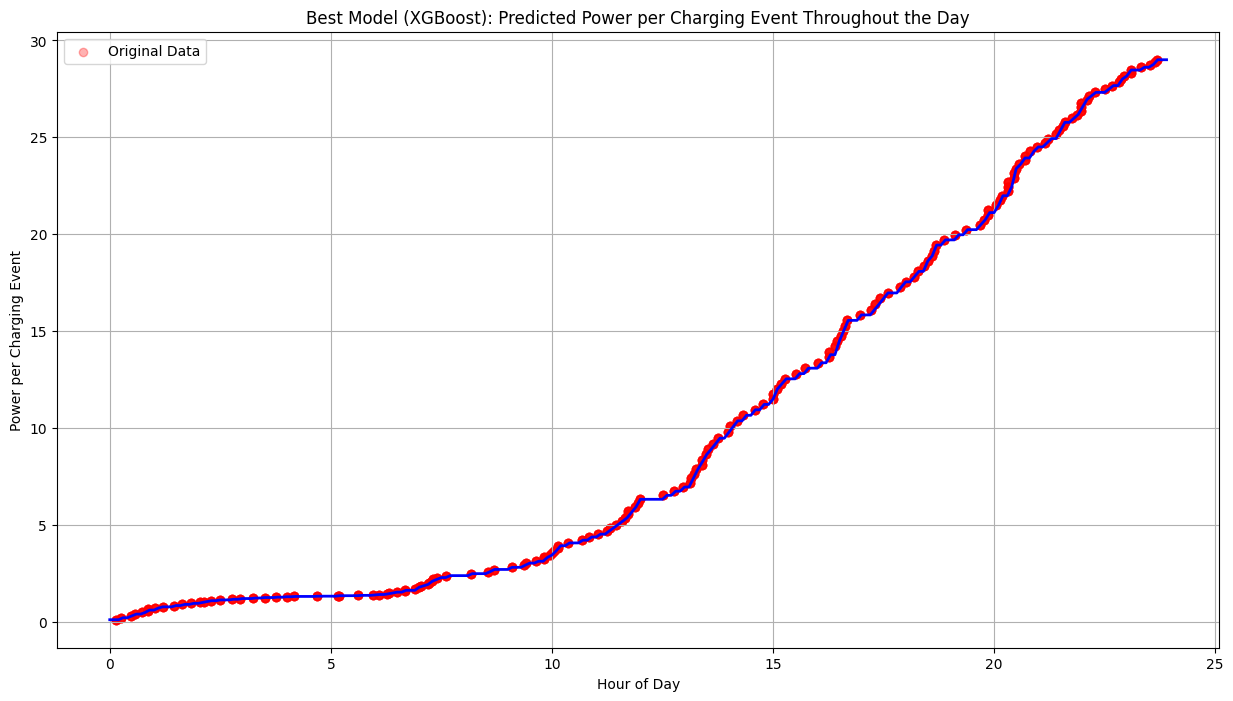

In [ ]:
# Plot the best model's predictions for a full day
plt.figure(figsize=(15, 8))
plt.plot(full_day_hours, full_day_predictions, 'b-', linewidth=2)
plt.scatter(data['Time'], data['Powerperchargingevent'], color='red', alpha=0.3, label='Original Data')
plt.title(f'Best Model ({best_model_name}): Predicted Power per Charging Event Throughout the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Power per Charging Event')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('best_model_full_day.png')
plt.close()



Hourly charging profile has been saved to 'hourly_charging_profile.csv'


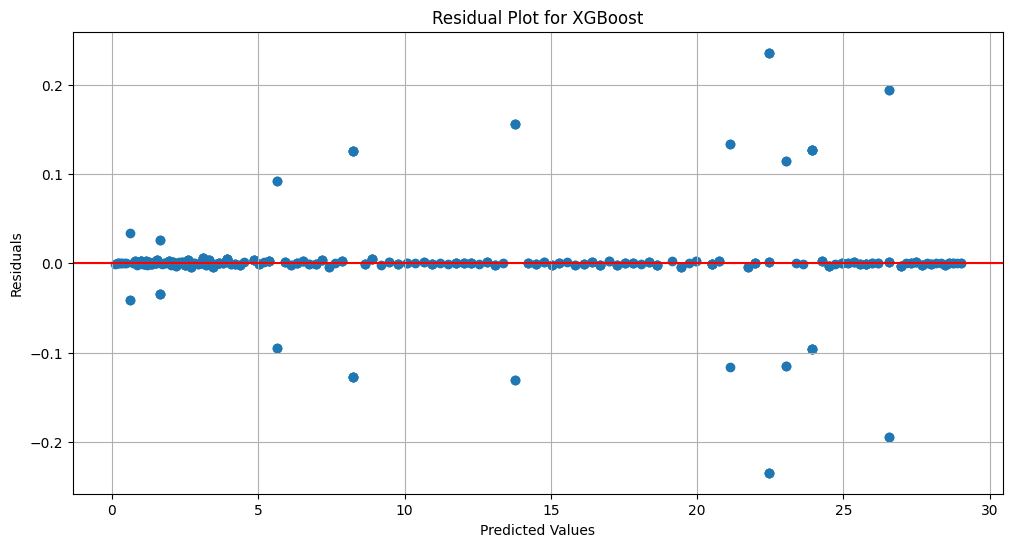

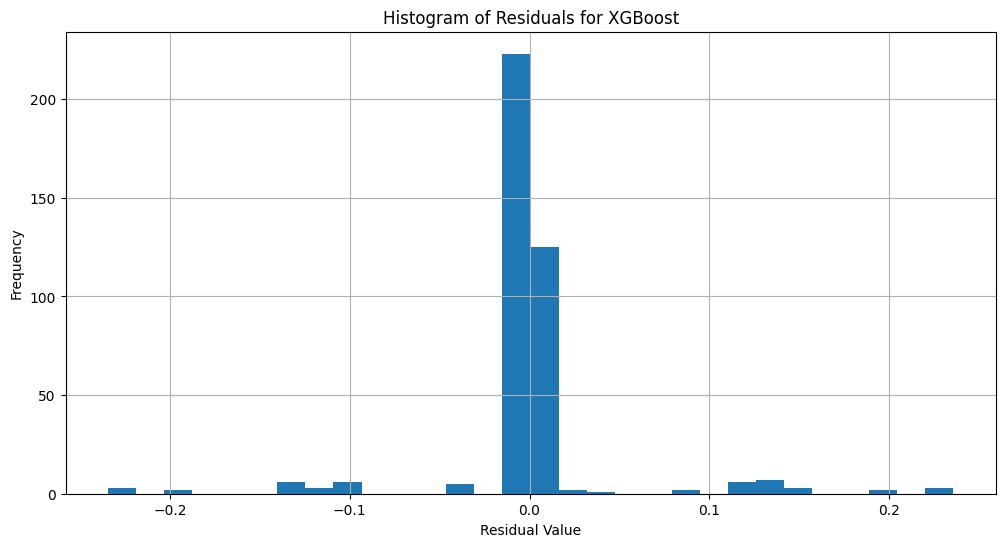


=== SUMMARY OF FINDINGS ===
Best Model: XGBoost
R² Score: 1.0000
RMSE: 0.0496
MAE: 0.0174

The predicted charging power profile by hour has been generated and saved.
Check the generated visualizations for more insights.


In [ ]:
# Calculate charging profile by hour
charging_profile = pd.DataFrame({
    'Hour': full_day_hours.flatten(),
    'Power': full_day_predictions
})

# Save the charging profile to a CSV file
charging_profile.to_csv('hourly_charging_profile.csv', index=False)

print("\nHourly charging profile has been saved to 'hourly_charging_profile.csv'")

# Residual analysis for the best model
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title(f'Residual Plot for {best_model_name}')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
plt.savefig('residual_plot.png')
plt.close()

# Histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30)
plt.title(f'Histogram of Residuals for {best_model_name}')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.savefig('residual_histogram.png')
plt.close()

# Summary of findings
print("\n=== SUMMARY OF FINDINGS ===")
print(f"Best Model: {best_model_name}")
print(f"R² Score: {results[best_model_name]['R²']:.4f}")
print(f"RMSE: {results[best_model_name]['RMSE']:.4f}")
print(f"MAE: {results[best_model_name]['MAE']:.4f}")
print("\nThe predicted charging power profile by hour has been generated and saved.")
print("Check the generated visualizations for more insights.")